<a href="https://www.kaggle.com/code/ruforavishnu/project3-supervised-learning-decision-trees-churn?scriptVersionId=224026767" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


Load and Explore the Dataset

In [2]:
import os

# Check files in /kaggle/working
print("Files in /kaggle/working:", os.listdir("/kaggle/working"))

# Check files in /kaggle/input
print("Files in /kaggle/input:", os.listdir("/kaggle/input"))


Files in /kaggle/working: ['__notebook__.ipynb']
Files in /kaggle/input: ['customer-churn-dataset']


In [3]:
import pandas as pd

# Correct file path
reqd_file_path = "/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv"

# Load the dataset
df = pd.read_csv(reqd_file_path)

# Display first few rows
print(df.head())


   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


In [5]:
print(df.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


 Data Preprocessing

In [6]:
df = df.dropna()

In [7]:
df.drop(columns=['CustomerID'], inplace=True)

Encode Categorical Variables

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])
    

In [9]:
print(df.head())

    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0       0    39.0             14.0            5.0           18.0   
1  65.0       0    49.0              1.0           10.0            8.0   
2  55.0       0    14.0              4.0            6.0           18.0   
3  58.0       1    38.0             21.0            7.0            7.0   
4  23.0       1    32.0             20.0            5.0            8.0   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  
0                  2                0        932.0              17.0    1.0  
1                  0                1        557.0               6.0    1.0  
2                  0                2        185.0               3.0    1.0  
3                  2                1        396.0              29.0    1.0  
4                  0                1        617.0              20.0    1.0  


Feature Selection

In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [11]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0


In [12]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440832, dtype: float64

Split the Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
X_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
321745,24.0,1,58.0,28.0,0.0,4.0,0,0,665.22,29.0
175119,24.0,1,26.0,12.0,1.0,26.0,0,2,754.00,12.0
272448,18.0,1,36.0,8.0,0.0,7.0,1,2,852.86,9.0
66769,36.0,0,18.0,9.0,2.0,23.0,1,1,758.00,3.0
70297,57.0,0,27.0,26.0,8.0,15.0,0,1,688.00,10.0
...,...,...,...,...,...,...,...,...,...,...
259179,41.0,1,44.0,18.0,2.0,13.0,1,0,717.39,3.0
365839,45.0,0,44.0,14.0,3.0,13.0,0,0,995.38,8.0
131932,37.0,0,9.0,4.0,10.0,12.0,0,1,979.00,8.0
146867,33.0,1,27.0,5.0,10.0,20.0,1,0,824.00,1.0


In [15]:
X_test

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
159565,23.0,0,10.0,16.0,8.0,16.0,1,2,589.00,13.0
127464,33.0,1,3.0,20.0,0.0,22.0,0,2,158.00,12.0
22398,27.0,0,57.0,3.0,0.0,24.0,2,0,915.00,26.0
99337,35.0,0,28.0,23.0,5.0,13.0,0,0,334.00,29.0
300997,28.0,1,53.0,30.0,2.0,5.0,0,0,568.86,15.0
...,...,...,...,...,...,...,...,...,...,...
285007,39.0,1,57.0,28.0,1.0,20.0,0,2,951.98,5.0
39267,31.0,0,60.0,9.0,9.0,15.0,2,2,589.00,25.0
397190,23.0,1,36.0,17.0,2.0,3.0,1,2,621.06,14.0
136393,62.0,0,54.0,22.0,8.0,17.0,1,0,896.00,9.0


In [16]:
y_train

321745    0.0
175119    1.0
272448    0.0
66769     1.0
70297     1.0
         ... 
259179    0.0
365839    0.0
131932    1.0
146867    1.0
121958    1.0
Name: Churn, Length: 352665, dtype: float64

In [17]:
y_test

159565    1.0
127464    1.0
22398     1.0
99337     1.0
300997    0.0
         ... 
285007    0.0
39267     1.0
397190    0.0
136393    1.0
326974    0.0
Name: Churn, Length: 88167, dtype: float64

Build and Train the Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

Train the Model:

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

 Evaluate the Model

In [20]:
y_pred = clf.predict(X_test)

In [21]:
y_pred

array([1., 1., 1., ..., 0., 1., 0.])

Calculate Performance Metrics:

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

#Display the results now
print(f'Accuracy: {accuracy*100:.2f} %')
print(f'Precision: {precision*100:.2f} %')
print(f'Recall: {recall*100:0.2f} %')
print(f'\n\nConfusion matrix:')
print(cm)

Accuracy: 99.99 %
Precision: 100.00 %
Recall: 99.98 %


Confusion matrix:
[[38061     2]
 [   11 50093]]


Visualize the Decision Tree

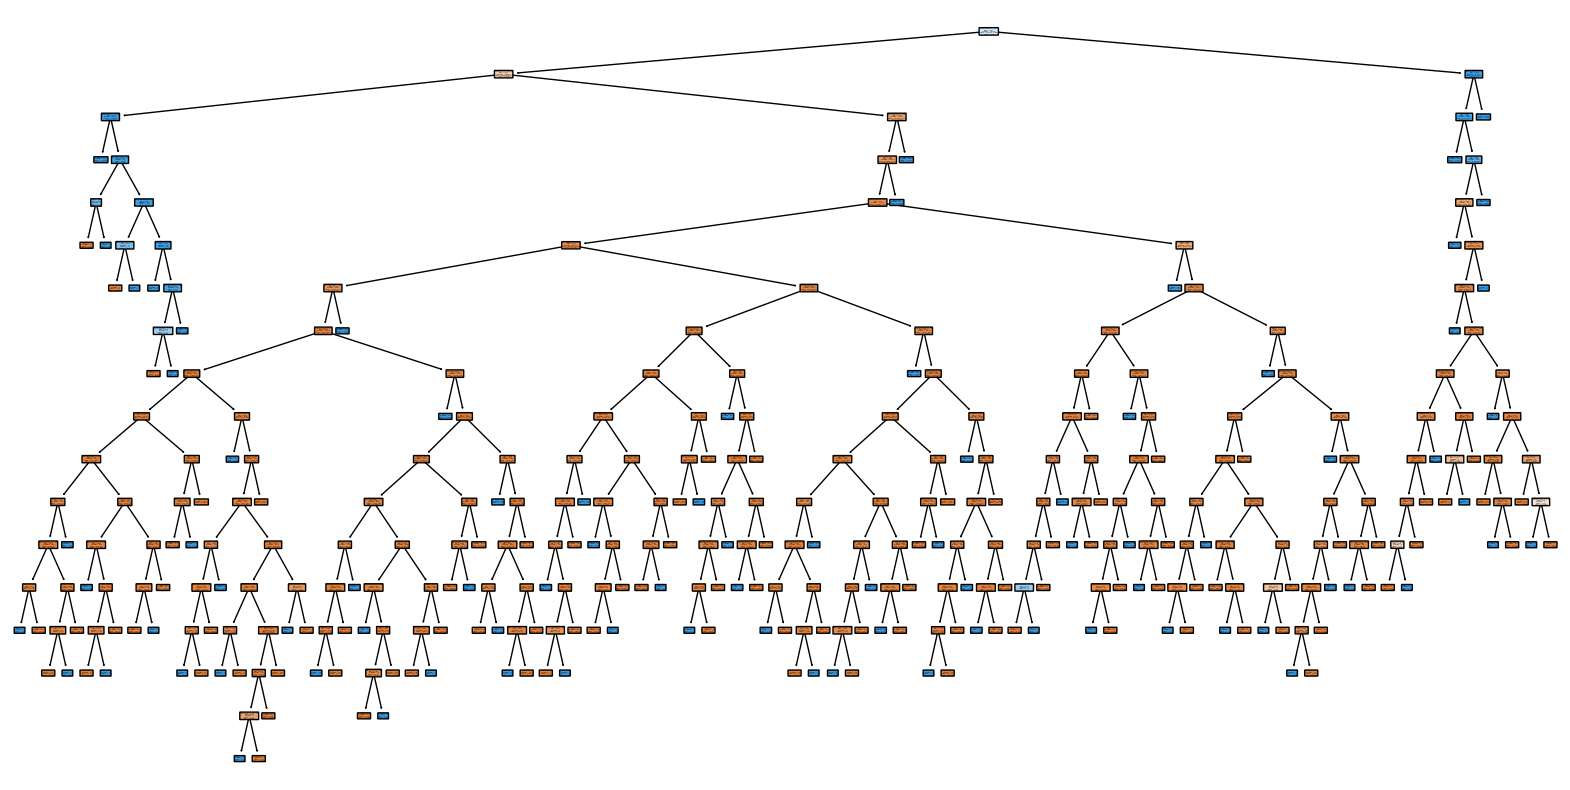

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'], rounded=True)


plt.show()

Interpret Results and Make Recommendations

In [24]:
importances = clf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance':importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

             Feature  Importance
4      Support Calls    0.359228
8        Total Spend    0.242401
0                Age    0.144759
5      Payment Delay    0.130782
7    Contract Length    0.057855
9   Last Interaction    0.047651
2             Tenure    0.007552
1             Gender    0.007151
6  Subscription Type    0.002030
3    Usage Frequency    0.000591


From this we can find out that the top ones are the main reasons for churn. 

Lets display that.

In [25]:
top_features = feature_importances.head(5)


In [26]:
print('\nThe top 5 reasons for churn are:\n')

for index, row in top_features.iterrows():
    print(f"{row['Feature']:<20} \t   (Importance: {row['Importance']*100:>10.2f}%)")


The top 5 reasons for churn are:

Support Calls        	   (Importance:      35.92%)
Total Spend          	   (Importance:      24.24%)
Age                  	   (Importance:      14.48%)
Payment Delay        	   (Importance:      13.08%)
Contract Length      	   (Importance:       5.79%)


Project successfully completed.